In [2]:
#mounting google drive to access final dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#unzipping the data folder to content directory
!unzip /content/drive/MyDrive/Research\ project/data.zip 

Archive:  /content/drive/MyDrive/Research project/data.zip
   creating: content/data/
   creating: content/data/train/
   creating: content/data/train/Female/
  inflating: content/data/train/Female/Female_original_48__F_Right_thumb_finger.jpg_d1874c1a-875f-4305-be79-445f3ca10a71.jpg  
  inflating: content/data/train/Female/550__F_Right_ring_finger.jpg  
  inflating: content/data/train/Female/Female_original_508__F_Left_index_finger.jpg_4ba4ad67-bda0-4bec-8080-829eb4b3d7f9.jpg  
  inflating: content/data/train/Female/479__F_Left_middle_finger.jpg  
  inflating: content/data/train/Female/536__F_Right_little_finger.jpg  
  inflating: content/data/train/Female/31__F_Left_middle_finger.jpg  
  inflating: content/data/train/Female/25__F_Left_ring_finger.jpg  
  inflating: content/data/train/Female/156__F_Left_thumb_finger.jpg  
  inflating: content/data/train/Female/Female_original_204__F_Left_ring_finger.jpg_1331b5f7-635b-403a-98f2-3dbc2f1f6212.jpg  
  inflating: content/data/train/Female/4

In [ ]:
#Packages and versions installed
!pip install tensorflow==2.9.2
!pip install numpy==1.21.6
!pip install matplotlib
!pip install sscikit-learn==1.0.2
!pip install keras==2.9.0


In [4]:
# Import The Libraries 

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn import metrics 



In [5]:
# training and testing path variables assigned
train_Path = '/content/content/data/train'
val_Path = '/content/content/data/val'

In [6]:
# Set image resize variable
IMAGE_SIZE = [96, 96] 

In [7]:
#pre-training model without including the top layer trained in Imagenet dataset
pretrained_inception = InceptionV3(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   
)

87910968/87910968 [==============================] - 1s 0us/step


In [8]:
pretrained_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['batch_normalization[

In [9]:
#freezing the weights of the model
for layer in pretrained_inception.layers:
  layer.trainable = False
     

In [10]:


# Flatten the output layer to 1 dimension
x = Flatten()(pretrained_inception.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)      
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = Dense  (2, activation='sigmoid')(x)           

model = Model(pretrained_inception.input, x) 

model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [12]:
#defining class labels
gender_label = ['Male', 'Female']

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['batch_normalization[0][0]']

In [14]:
#training and test data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)



training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 512,
    class_mode = 'categorical' 
)

val_set = test_datagen.flow_from_directory(
    val_Path,
    target_size = IMAGE_SIZE,
    batch_size = 512,
    class_mode = 'categorical'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [15]:
# Fit the model.

history = model.fit_generator(
    training_set,
    validation_data = val_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(val_set)
)

<ipython-input-15-51fe2b22f10d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
7/7 [==============================] - 71s 9s/step - loss: 1.6088 - accuracy: 0.5263 - val_loss: 0.9610 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 60s 9s/step - loss: 0.8326 - accuracy: 0.5194 - val_loss: 0.6924 - val_accuracy: 0.5312
Epoch 3/50
7/7 [==============================] - 60s 9s/step - loss: 0.6936 - accuracy: 0.5622 - val_loss: 0.6535 - val_accuracy: 0.5888
Epoch 4/50
7/7 [==============================] - 62s 9s/step - loss: 0.6591 - accuracy: 0.5962 - val_loss: 0.6210 - val_accuracy: 0.6425
Epoch 5/50
7/7 [==============================] - 60s 9s/step - loss: 0.6381 - accuracy: 0.6250 - val_loss: 0.6123 - val_accuracy: 0.6812
Epoch 6/50
7/7 [==============================] - 62s 10s/step - loss: 0.6239 - accuracy: 0.6356 - val_loss: 0.6307 - val_accuracy: 0.6200
Epoch 7/50
7/7 [==============================] - 60s 8s/step - loss: 0.6175 - accuracy: 0.6397 - val_loss: 0.6054 - val_accuracy: 0.6625
Epoch 8/50
7/7 [=================

In [16]:
#printing train accuracy and loss
result = model.evaluate(training_set,batch_size=256)
print("training loss, training accuracy",result)

7/7 [==============================] - 52s 7s/step - loss: 0.5386 - accuracy: 0.7169
training loss, training accuracy [0.5386039614677429, 0.7168750166893005]


In [17]:
#printing test accuracy and loss
result = model.evaluate(val_set,batch_size=256)
print("test_loss, test accuracy",result)

2/2 [==============================] - 11s 4s/step - loss: 0.5858 - accuracy: 0.6737
test_loss, test accuracy [0.5857769250869751, 0.6737499833106995]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


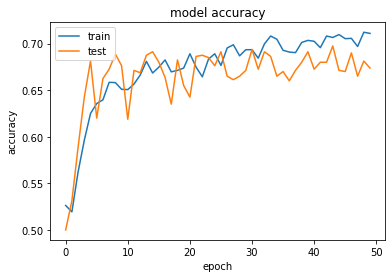

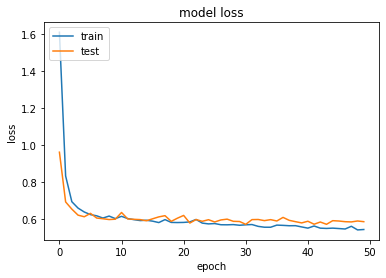

In [18]:
#plotting accuracy and loss graphs
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()